In [100]:
using Plots

In [101]:
Nkx = 10000 #kのx方向をNkx分割
Nky = 10000 #kのy方向をNky分割
M = 10000 #エネルギーをM分割．つまりM個の階級のヒストグラムを作る．

10000

In [102]:
#二次元の分散関係は三次元空間中の曲面として表される．ブリルアンゾーン内の各kの値で曲面の高さを2次元配列にする．

#分散関係
function Ek(kx,ky)
    return -2*(cos(kx)+cos(ky))
end

#波数をブリルアンゾーン内で分割
kxrange = range(-π,π,Nkx)
kyrange = range(-π,π,Nky)

#分散関係を表す二次元配列に値を入れていく．
E = zeros(Float64,Nkx,Nky)

for i in 1:Nkx
    for j in 1:Nky 
        E[i,j] = Ek(kxrange[i],kyrange[j])
    end
end

#println(E)

In [103]:
function count_bins(xmin,xmax,M,A)
    count = zeros(Int64,M)
    delta = (xmax-xmin)/M

    for i in 1:size(A,1)
        for j in 1:size(A,2)
            e = convert(Int64,ceil((A[i,j]-xmin)/delta))
            count[e] += 1
        end
    end

    return count
end

count_bins (generic function with 1 method)

In [104]:
#簡単な配列で関数の挙動を確認する．
A = rand(Float64,5,5)

println(A)
println("$(size(A,1)), $(size(A,2)), $(A[3,4]), $(count_bins(0,1,10,A))")

[0.09380783259056624 0.14869487103108314 0.4936511166402794 0.05098102253257408 0.4037251075933923; 0.2644564804197993 0.23246581698608348 0.8610810377871249 0.758074263168977 0.6449824206070792; 0.033026335146928876 0.21290348810631832 0.6312823857620808 0.00042510228908321235 0.5785051483035317; 0.49366134748735147 0.38152603429293686 0.8076352805581831 0.3558549820544482 0.6827690854039519; 0.7150300198334326 0.4934928569717618 0.6877687685233732 0.7445012643647274 0.9231131199636385]
5, 5, 0.00042510228908321235, [4, 1, 3, 2, 4, 1, 4, 3, 2, 1]


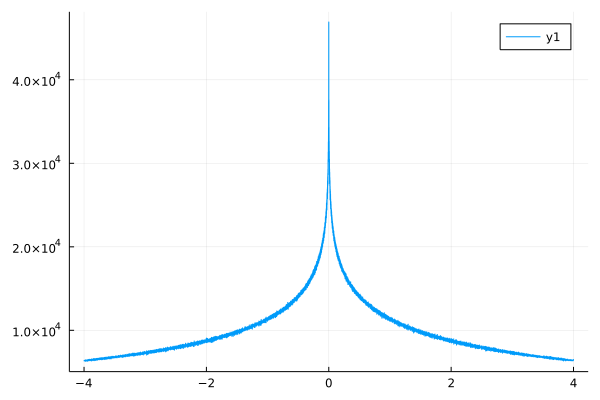

In [107]:
d = range(-4,4,M)

plot(d,count_bins(-4,4,M,E))